# Flipkart Product Analysis 

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [43]:
#reading and understand data
data=pd.read_csv("flipkart_com-ecommerce_sample.csv")
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [44]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [45]:
#checking the null values
data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

### Cleaning the data now

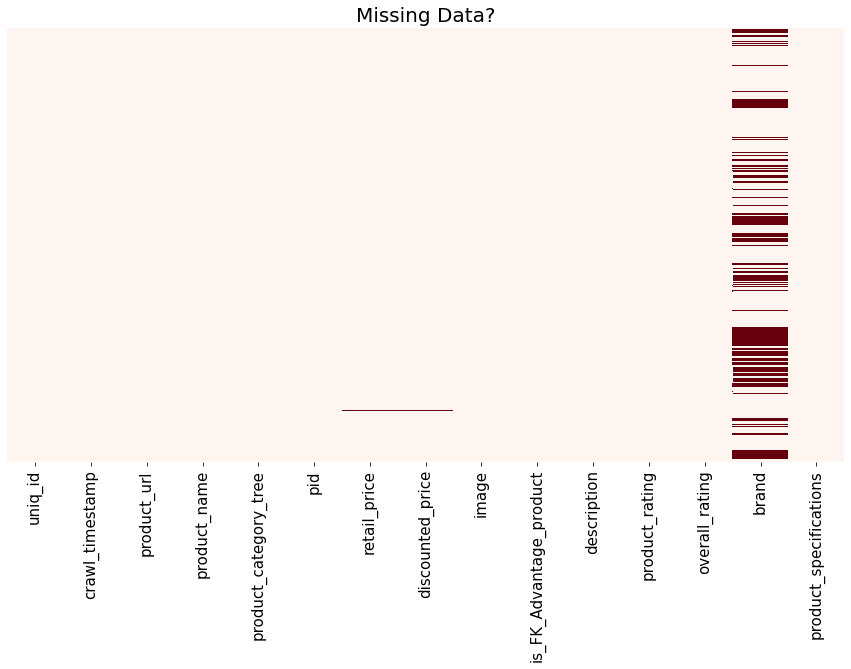

In [46]:
#checking the null values visually
plt.figure(figsize=(15,8))
sb.heatmap(data.isnull(),
            cmap='Reds',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data?',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

##### The Brand column is missing a hefty amount of data. Everything else looks relatively complete.

In [47]:
data.duplicated().sum()

0

##### No duplicated product

In [48]:
#converting crawl_timestamp to datetime datatype
data['crawl_timestamp'] = pd.to_datetime(data['crawl_timestamp'])
data['crawl_timestamp']

0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
19995   2015-12-01 10:15:43+00:00
19996   2015-12-01 10:15:43+00:00
19997   2015-12-01 10:15:43+00:00
19998   2015-12-01 10:15:43+00:00
19999   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 20000, dtype: datetime64[ns, UTC]

##### Now we will extract year and month from it

In [49]:
data['year']=data['crawl_timestamp'].apply(lambda x:x.year)
data['month']=data['crawl_timestamp'].apply(lambda x:x.month)

In [50]:
data['month']

0         3
1         3
2         3
3         3
4         3
         ..
19995    12
19996    12
19997    12
19998    12
19999    12
Name: month, Length: 20000, dtype: int64

In [51]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,year,month
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3


In [52]:
data['product_category_tree'].value_counts()

["Jewellery >> Necklaces & Chains >> Necklaces"]                                                                                                                                      1567
["Jewellery >> Rings"]                                                                                                                                                                 710
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]                                                                                     522
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                                                                                               430
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]                                                                                    332
                                                                 

##### Now let's look at the product_category_tree column.Now let's divide it

In [53]:
data['product_category_tree'][1]

'["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]'

In [54]:
for i in data['product_category_tree'][1].split('>>'):
    print(i)

["Furniture 
 Living Room Furniture 
 Sofa Beds & Futons 
 FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]


In [55]:
#it will create a main category column
data['main category']=data['product_category_tree'].apply(lambda x: x.split(">>")[0][2:])
data['main category'].value_counts()

Clothing                                                 6198
Jewellery                                                3531
Footwear                                                 1227
Mobiles & Accessories                                    1099
Automotive                                               1012
                                                         ... 
Kraft Seeds Dill Herb Seed (50 per packet)"]                1
Sugandh Vatika 24 Natural Masala, Sandal Incense..."]       1
Dressberry Green Synthetic  Clutch"]                        1
Kombee Girl's Printed Red, Pink Top & Capri Set"]           1
Foot Candy Women Flats"]                                    1
Name: main category, Length: 266, dtype: int64

In [56]:
#we are using try catch because if ex. secondary condition is not present it will not generate the error
def secondary(x):
    try:
        return x.split(">>")[1][1:]
    except IndexError:
        return 'NONE'
def tertiary(x):
    try:
        return x.split(">>")[2][1:]
    except IndexError:
        return 'NONE'
data['secondarycategory']=data['product_category_tree'].apply(secondary)
data['tertiarycategory']=data['product_category_tree'].apply(tertiary)


In [57]:
data[['main category','secondarycategory','tertiarycategory','retail_price']]

,main category,secondarycategory,tertiarycategory,retail_price
0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",999.0
1,Furniture,Living Room Furniture,Sofa Beds & Futons,32157.0
2,Footwear,Women's Footwear,Ballerinas,999.0
3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",699.0
4,Pet Supplies,Grooming,Skin & Coat Care,220.0
...,...,...,...,...
19995,Baby Care,Baby & Kids Gifts,Stickers,1500.0
19996,Baby Care,Baby & Kids Gifts,Stickers,1429.0
19997,Baby Care,Baby & Kids Gifts,Stickers,1299.0
19998,Baby Care,Baby & Kids Gifts,Stickers,1499.0


In [58]:
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,year,month,main category,secondarycategory,tertiarycategory
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43+00:00,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",2015,12,Baby Care,Baby & Kids Gifts,Stickers
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",2015,12,Baby Care,Baby & Kids Gifts,Stickers
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts 

In [59]:
#we will delete the unwanted columns from the data

data.drop(['uniq_id','crawl_timestamp','product_url','product_category_tree','pid','image'],inplace=True,axis=1)

In [60]:
#arangeing the columns
data=data.reindex(columns=['year', 'month','product_name','main category', 'secondarycategory', 'tertiarycategory',
        'retail_price', 'discounted_price',
       'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'
       ])

In [61]:
#Capitalizing the column name
data.columns=data.columns.map(str.title)
data.head()

,Year,Month,Product_Name,Main Category,Secondarycategory,Tertiarycategory,Retail_Price,Discounted_Price,Is_Fk_Advantage_Product,Description,Product_Rating,Overall_Rating,Brand,Product_Specifications
0,2016,3,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",999.0,379.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,2016,3,FabHomeDecor Fabric Double Sofa Bed,Furniture,Living Room Furniture,Sofa Beds & Futons,32157.0,22646.0,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,2016,3,AW Bellies,Footwear,Women's Footwear,Ballerinas,999.0,499.0,False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,2016,3,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",699.0,267.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,2016,3,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,Grooming,Skin & Coat Care,220.0,210.0,False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


### Now we'll visualize some sales

In [62]:
data.groupby('Month')['Month'].count()

Month
1      4850
2       245
3      1634
4      1137
5       773
6      1046
12    10315
Name: Month, dtype: int64

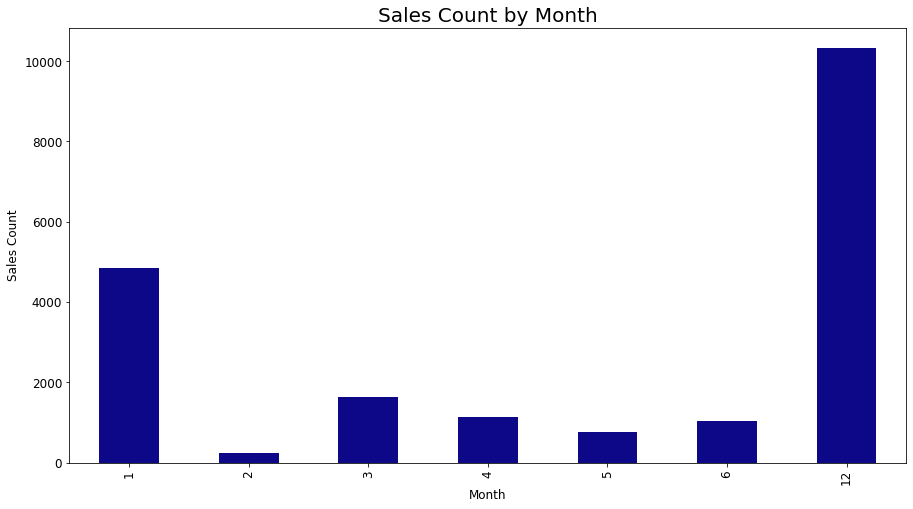

In [63]:
plt.figure(figsize=(15,8
                   ))
data.groupby('Month')['Month'].count().plot.bar(cmap='plasma')
plt.title('Sales Count by Month',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()

##### What happen in month 6-11(june to  november)

In [23]:
data.Year.value_counts()

2015    10315
2016     9685
Name: Year, dtype: int64

Text(0.5, 1.0, 'sale comparision in year 2015 and 2016')

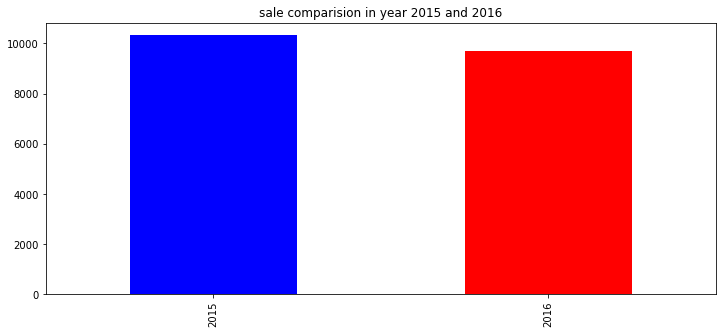

In [24]:
plt.figure(figsize=(12,5))
data.Year.value_counts().plot.bar(color=['blue','red'])
plt.title('sale comparision in year 2015 and 2016')

### Sale comparision in the main category


Top Ten Main Categories by Sales.

Clothing                       6198
Jewellery                      3531
Footwear                       1227
Mobiles & Accessories          1099
Automotive                     1012
Home Decor & Festive Needs      929
Beauty and Personal Care        710
Home Furnishing                 700
Kitchen & Dining                647
Computers                       578
Name: Main Category, dtype: int64


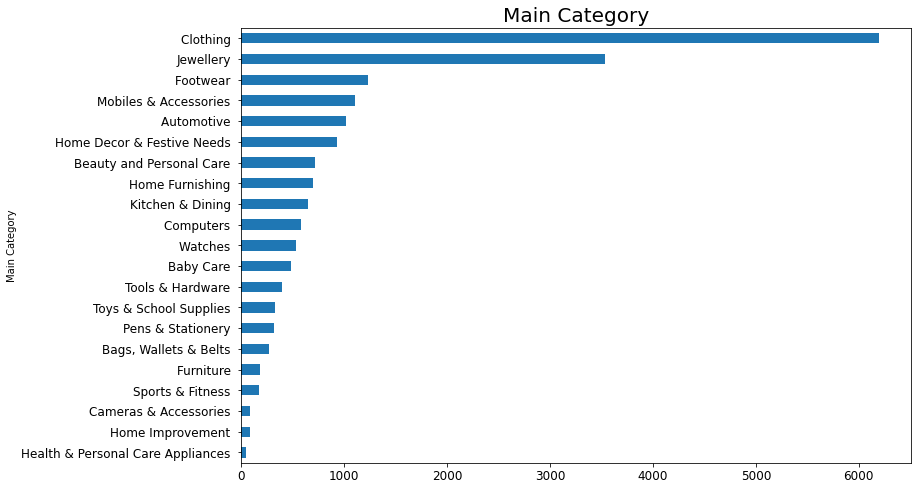

In [25]:
#top main category items in term of sale
print('Top Ten Main Categories by Sales.\n')
print(data['Main Category'].value_counts()[:10])

#top main category sale
plt.figure(figsize=(12,8))

data.groupby('Main Category')['Main Category'].count().sort_values(ascending=False)[20::-1].plot(kind='barh')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


### Sale comparision in the Secondary category

Top Ten Seconday Categories by Sales.

Women's Clothing                 3901
Men's Clothing                   1773
Necklaces & Chains               1606
Accessories & Spare parts         925
Tablet Accessories                801
Women's Footwear                  781
Bangles, Bracelets & Armlets      724
Rings"]                           710
Wrist Watches                     523
Kids' Clothing                    520
Name: Secondarycategory, dtype: int64


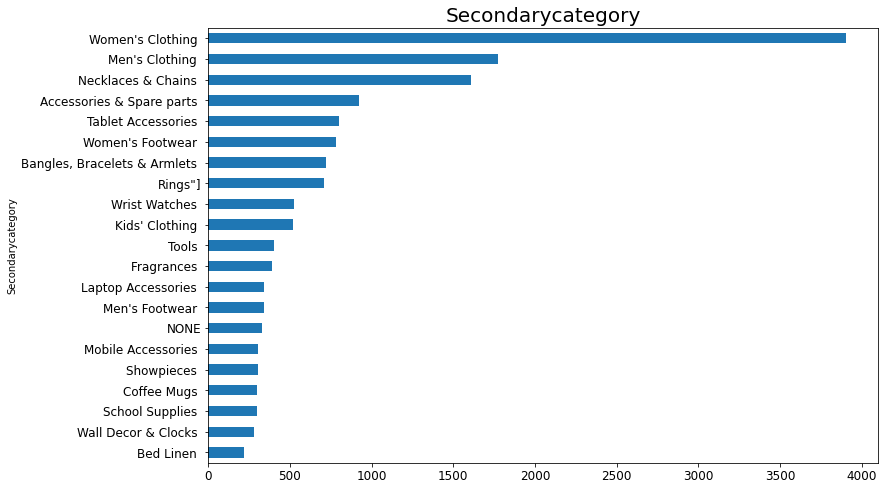

In [26]:
#top Secondary category items in term of sale
print('Top Ten Seconday Categories by Sales.\n')
print(data['Secondarycategory'].value_counts()[:10])

#top main category sale
plt.figure(figsize=(12,8))

data.groupby('Secondarycategory')['Secondarycategory'].count().sort_values(ascending=False)[20::-1].plot(kind='barh')
plt.title('Secondarycategory',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


##### Women's clothing is more than double then the men's clothing it feels that women shop a lot haha. So it can be interpreted than the ratio of women is greater than that of men ,though there is not gender column

### Sale comparision in the Tertiary Category

Top Ten Tertiary Categories by Sales.

Western Wear                   1981
Necklaces"]                    1567
NONE                           1457
Lingerie, Sleep & Swimwear     1208
T-Shirts                        903
Cases & Covers                  796
Car Interior & Exterior         677
Ethnic Wear                     485
Casual Shoes                    454
Bangles"]                       430
Name: Tertiarycategory, dtype: int64


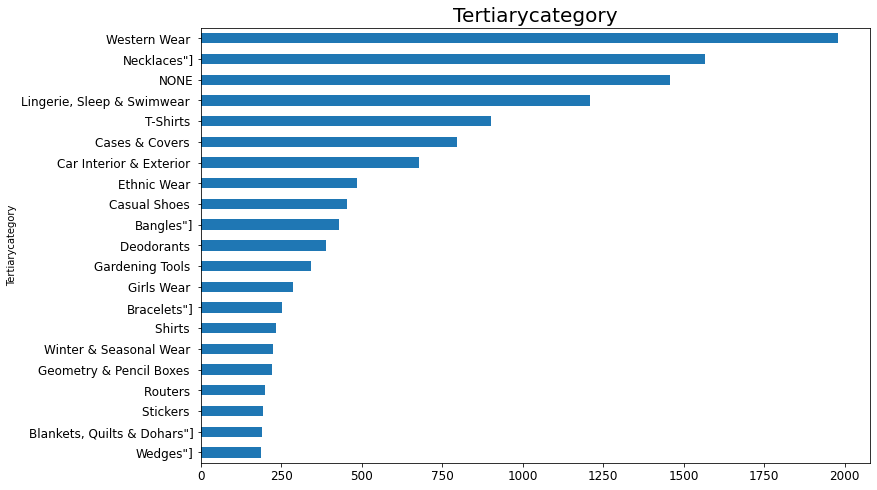

In [27]:
print('Top Ten Tertiary Categories by Sales.\n')
print(data['Tertiarycategory'].value_counts()[:10])

#top main category sale
plt.figure(figsize=(12,8))

data.groupby('Tertiarycategory')['Tertiarycategory'].count().sort_values(ascending=False)[20::-1].plot(kind='barh')
plt.title('Tertiarycategory',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


##### So i comes to a conclusion that most woman  prefers to shop for parties from flipkart


## Most expensive and Least expensive item present in the flipkart

In [28]:
print(data['Retail_Price'].max())
print(data['Retail_Price'].min())

571230.0
35.0


In [29]:

print(data[data['Retail_Price']==571230.0]['Main Category'])


print(data[data['Retail_Price']==35.0]['Main Category'])

116    Watches 
Name: Main Category, dtype: object
10554    Kitchen & Dining 
Name: Main Category, dtype: object


### Let's explore the Discount now and see what insights we can get from it 

In [30]:
data.head()

,Year,Month,Product_Name,Main Category,Secondarycategory,Tertiarycategory,Retail_Price,Discounted_Price,Is_Fk_Advantage_Product,Description,Product_Rating,Overall_Rating,Brand,Product_Specifications
0,2016,3,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",999.0,379.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,2016,3,FabHomeDecor Fabric Double Sofa Bed,Furniture,Living Room Furniture,Sofa Beds & Futons,32157.0,22646.0,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,2016,3,AW Bellies,Footwear,Women's Footwear,Ballerinas,999.0,499.0,False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,2016,3,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",699.0,267.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,2016,3,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,Grooming,Skin & Coat Care,220.0,210.0,False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [31]:
#discount formula = ((retail - sale) / retail) * 100
data['Discount%']=round(((data['Retail_Price']-data['Discounted_Price'])/data['Retail_Price'])*100,1)
data['Discount%']

0        62.1
1        29.6
2        50.1
3        61.8
4         4.5
         ... 
19995    51.3
19996    20.0
19997    23.1
19998    20.0
19999    33.4
Name: Discount%, Length: 20000, dtype: float64

In [32]:
data.head()

,Year,Month,Product_Name,Main Category,Secondarycategory,Tertiarycategory,Retail_Price,Discounted_Price,Is_Fk_Advantage_Product,Description,Product_Rating,Overall_Rating,Brand,Product_Specifications,Discount%
0,2016,3,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",999.0,379.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.1
1,2016,3,FabHomeDecor Fabric Double Sofa Bed,Furniture,Living Room Furniture,Sofa Beds & Futons,32157.0,22646.0,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.6
2,2016,3,AW Bellies,Footwear,Women's Footwear,Ballerinas,999.0,499.0,False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.1
3,2016,3,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",699.0,267.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.8
4,2016,3,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,Grooming,Skin & Coat Care,220.0,210.0,False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.5


In [33]:
data[['Product_Name','Retail_Price','Discounted_Price','Discount%']]

,Product_Name,Retail_Price,Discounted_Price,Discount%
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,62.1
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,29.6
2,AW Bellies,999.0,499.0,50.1
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,61.8
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,4.5
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,1500.0,730.0,51.3
19996,Wallmantra Large Vinyl Stickers Sticker,1429.0,1143.0,20.0
19997,Elite Collection Medium Acrylic Sticker,1299.0,999.0,23.1
19998,Elite Collection Medium Acrylic Sticker,1499.0,1199.0,20.0


##### we are going to create a few new dataframes that contain the product by category, average discounted percentages and count of each product.

In [34]:
MainCategoryDiscount = pd.DataFrame(data.groupby('Main Category').agg({
    'Discount%':['mean'],
    'Main Category':['count']
}))
MainCategoryDiscount

,Discount%,Main Category
,mean,count
Main Category,,
"883 Police Full Sleeve Solid Men's Jacket""]",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""]",27.6,1
"ANAND ARCHIES Girls Flats""]",10.0,2
"ANAND ARCHIES Girls Wedges""]",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""]",0.0,1
...,...,...
"run of luck Solid Women's Round Neck Dark Blue T...""]",0.0,1
"soie Fashion Women's Full Coverage Bra""]",10.0,1


In [35]:
SecondaryCategoryDiscount = pd.DataFrame(data.groupby('Secondarycategory').agg({
    'Discount%':['mean'],
    'Secondarycategory':['count']
}))
SecondaryCategoryDiscount

,Discount%,Secondarycategory
,mean,count
Secondarycategory,,
"AAO+ Aviator Sunglasses""]",70.100000,3
"ABCD Small Bean Bag With Foam Filling (Black)""]",60.900000,1
Academic Texts,8.333333,9
Accessories,42.653982,114
Accessories & Spare parts,55.370314,925
...,...,...
"Zyaden Oval Sunglasses""]",60.100000,2
"barbarik Wayfarer, Aviator Sunglasses""]",88.000000,1


In [36]:
TertiaryCategoryDiscount = pd.DataFrame(data.groupby('Tertiarycategory').agg({
    'Discount%':['mean'],
    'Tertiarycategory':['count']
}))
TertiaryCategoryDiscount

,Discount%,Tertiarycategory
,mean,count
Tertiarycategory,,
"3wish Wrist Watches""]",66.8,1
"A Avon Wrist Watches""]",50.4,2
A R ENTERPRISES Musical Instruments & Toys,70.1,1
"ABCD XL Bean Bag With Foam Filling (Orange)""]",70.5,1
AKUP Coffee Mugs,48.2,22
...,...,...
"piftif Women's Sports Bra""]",53.8,1
posterchacha Coffee Mugs,12.5,1


In [37]:
TertiaryCategoryDiscount.columns

MultiIndex([(       'Discount%',  'mean'),
            ('Tertiarycategory', 'count')],
           )

In [38]:
#converting into one level to make it look better
TertiaryCategoryDiscount.columns=['_'.join(col) for col in TertiaryCategoryDiscount.columns]
MainCategoryDiscount.columns=['_'.join(col) for col in MainCategoryDiscount.columns]
SecondaryCategoryDiscount.columns=['_'.join(col) for col in SecondaryCategoryDiscount.columns]



#### Discount in Main Category

In [39]:
MainCategoryDiscount = MainCategoryDiscount.sort_values(by=['Main Category_count'],ascending=False)[:20]
SecondaryCategoryDiscount = SecondaryCategoryDiscount.sort_values(by=['Secondarycategory_count'],ascending=False)[:20]
TertiaryCategoryDiscount = TertiaryCategoryDiscount.sort_values(by=['Tertiarycategory_count'],ascending=False)[:20]


Top 10 Main Category By Discount
Main Category
Watches                        20.169318
Computers                      43.464223
Kitchen & Dining               43.769612
Home Furnishing                37.218143
Beauty and Personal Care       19.831735
Home Decor & Festive Needs     36.647573
Automotive                     54.649901
Mobiles & Accessories          51.001185
Footwear                       36.267184
Jewellery                      40.891198
Clothing                       45.071301
Name: Discount%_mean, dtype: float64


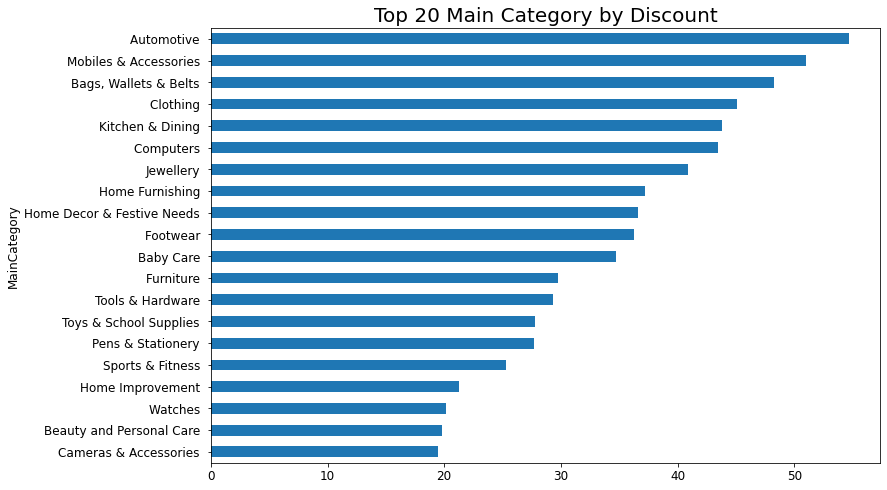

In [40]:
plt.figure(figsize=(12,8))
MainCategoryDiscount['Discount%_mean'][20::-1].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 20 Main Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('MainCategory',fontsize=12)
print("Top 10 Main Category By Discount")
print(MainCategoryDiscount['Discount%_mean'][10::-1])

#### Discount in Secondary Category

Top 10 Secondary Category By Discount
Secondarycategory
Tools                            29.165664
Kids' Clothing                   36.518077
Wrist Watches                    19.988868
Rings"]                          24.945275
Bangles, Bracelets & Armlets     52.560111
Women's Footwear                 37.906667
Tablet Accessories               49.673217
Accessories & Spare parts        55.370314
Necklaces & Chains               42.721611
Men's Clothing                   35.715754
Women's Clothing                 50.500619
Name: Discount%_mean, dtype: float64


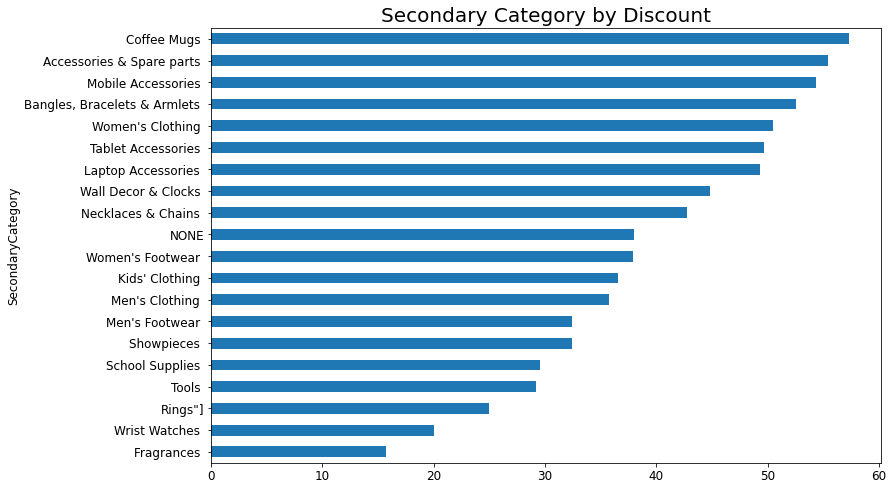

In [41]:
plt.figure(figsize=(12,8))
SecondaryCategoryDiscount['Discount%_mean'][20::-1].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('SecondaryCategory',fontsize=12)
print("Top 10 Secondary Category By Discount")
print(SecondaryCategoryDiscount['Discount%_mean'][10::-1])

#### Discount in Tertiary Category

Top 10 Tertiary Category By Discount
Tertiarycategory
Deodorants                     15.781186
Bangles"]                      60.057809
Casual Shoes                   33.753097
Ethnic Wear                    51.112810
Car Interior & Exterior        60.212741
Cases & Covers                 49.741058
T-Shirts                       35.830233
Lingerie, Sleep & Swimwear     59.606716
NONE                           32.319890
Necklaces"]                    42.543918
Western Wear                   46.082203
Name: Discount%_mean, dtype: float64


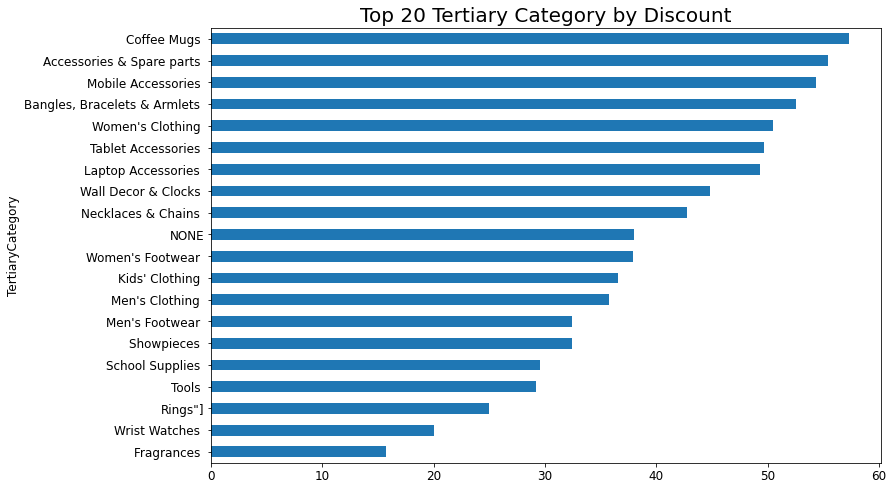

In [42]:
plt.figure(figsize=(12,8))
SecondaryCategoryDiscount['Discount%_mean'][20::-1].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 20 Tertiary Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('TertiaryCategory',fontsize=12)
print("Top 10 Tertiary Category By Discount")
print(TertiaryCategoryDiscount['Discount%_mean'][10::-1])